In [7]:
"""
Boilerplate
"""
%pylab inline
import math
import numpy as np

import astropy.table
from astroML.correlation import bootstrap_two_point_angular

Populating the interactive namespace from numpy and matplotlib


In [10]:
"""

Presumably, the data comes in coordinate point (x,y). 
The following function finds the distance bewteen two such points.

I don't know if it's easier to treat (x,y) as a tuple, but
that's what I'm doing.

"""

def distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

In [8]:
distance((0,0),(3,4))

5.0

In [28]:
# Trying out meshgrid

x=np.linspace(0,10,11)
y=np.linspace(10,20,11)
X,Y = np.meshgrid(x,y)

Y

array([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.],
       [13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.],
       [14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.],
       [18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18.],
       [19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.],
       [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]])

In [31]:
# Trying out masking
my_array = np.random.random(9)
mask = [np.logical_and(my_array>i/3.,my_array<(i+1)/3.) for i in range(0,3)]
mask

[array([False, False, False,  True, False, False, False, False,  True]),
 array([False, False, False, False,  True,  True,  True, False, False]),
 array([ True,  True,  True, False, False, False, False,  True, False])]

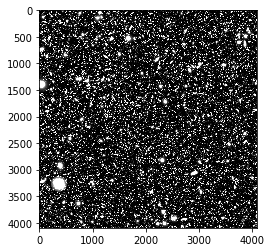

In [42]:
import astropy.io.fits as fits

path = '/Users/kasia/Downloads/LSST_i.fits'
hdulist = fits.open(path)
plt.imshow(hdulist[0].data,vmin=0,vmax=500,cmap='gray')

image = fits.open(path)[0].data # This is going to be the image
table = fits.open(path)[1].data # This is going to be the table


In [8]:
import astropy.table
from astroML.correlation import bootstrap_two_point_angular

In [9]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

data = astropy.table.Table.read('/Users/kasia/Downloads/LSST_i.fits')
low_purity = data[np.where(data['purity']<.98)[0]]
high_purity = data[np.where(data['purity']>.98)[0]]

In [10]:
def compute_results(Nbins=16, Nbootstraps=10,  method='landy-szalay', rseed=0):
    np.random.seed(rseed)
    bins = 10 ** np.linspace(np.log10(1 / 60.), np.log10(6), 16)

    results = [bins]
    for D in [low_purity, high_purity]:
        results += bootstrap_two_point_angular(D['dx']/3600,
                                               D['dy']/3600,
                                               bins=bins,
                                               method=method,
                                               Nbootstraps=Nbootstraps)
    return results

(bins, r_corr, r_corr_err, r_bootstraps,
 b_corr, b_corr_err, b_bootstraps) = compute_results()

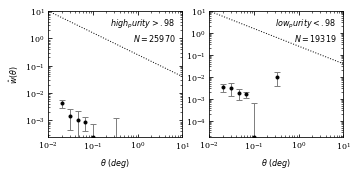

In [12]:
bin_centers = 0.5 * (bins[1:] + bins[:-1])

corr = [r_corr, b_corr]
corr_err = [r_corr_err, b_corr_err]
bootstraps = [r_bootstraps, b_bootstraps]
labels = ['$high_purity > .98$\n$N=%i$' % len(low_purity),
          '$low_purity < .98$\n$N=%i$' % len(high_purity)]

fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

for i in range(2):
    ax = fig.add_subplot(121 + i, xscale='log', yscale='log')

    ax.errorbar(bin_centers, corr[i], corr_err[i],
                fmt='.k', ecolor='gray', lw=1)

    t = np.array([0.01, 10])
    ax.plot(t, 10 * (t / 0.01) ** -0.8, ':k', linewidth=1)

    ax.text(0.95, 0.95, labels[i],
            ha='right', va='top', transform=ax.transAxes)
    ax.set_xlabel(r'$\theta\ (deg)$')
    if i == 0:
        ax.set_ylabel(r'$\hat{w}(\theta)$')

In [16]:
np.diff([1,2,3,4,6,12])

array([1, 1, 1, 2, 6])

In [18]:
bins

array([0.01666667, 0.02467567, 0.03653332, 0.05408904, 0.08008099,
       0.11856311, 0.17553744, 0.25989021, 0.38477787, 0.56967905,
       0.84343267, 1.24873586, 1.84880348, 2.73722764, 4.05257521,
       6.        ])

In [19]:
bins[1]-bins[0]

0.008009001217401682

In [26]:
for i in range (len(bins) -1):
    print(bins[i+1] - bins[i])

0.008009001217401682
0.011857647247422175
0.017555721921829637
0.025991949816487545
0.038482123279861044
0.056974325611657634
0.08435277220272194
0.12488765951849035
0.18490118454581245
0.273753613273398
0.40530319459188313
0.6000676213260752
0.8884241599095057
1.3153475706065643
1.9474247882642226


In [21]:
10 ** np.linspace(np.log10(1 / 60.), np.log10(6), 16)

array([0.01666667, 0.02467567, 0.03653332, 0.05408904, 0.08008099,
       0.11856311, 0.17553744, 0.25989021, 0.38477787, 0.56967905,
       0.84343267, 1.24873586, 1.84880348, 2.73722764, 4.05257521,
       6.        ])

In [23]:
np.log10(6)

0.7781512503836436

In [24]:
np.log10(1 / 60.)

-1.7781512503836436